# APEX Gun 

In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6,6)
%config InlineBackend.figure_format = 'retina'

In [3]:
from distgen import Generator

G = Generator('distgen_laser.yaml')
G['n_particle'] = 10000
G

<disgten.Generator with input: 
n_particle: 10000
output:
  type: null
random_type: hammersley
start:
  MTE:
    units: millielectron_volt
    value: 250.0
  type: cathode
t_dist:
  avg_t:
    units: picosecond
    value: 0.0
  n_sigma_cutoff: 3
  sigma_t:
    units: picosecond
    value: 8.5
  type: gaussian
total_charge:
  units: picocoulomb
  value: 10.0
transforms: null
xy_dist:
  file: /Users/chrisonian/Code/GitHub/lume-astra/docs/examples/templates/apex_gun/2019_11_04_135614reg_out.txt
  type: file2d

>

In [4]:
G.run()
G.particles

<ParticleGroup with 10000 particles at 0x15ab04130>

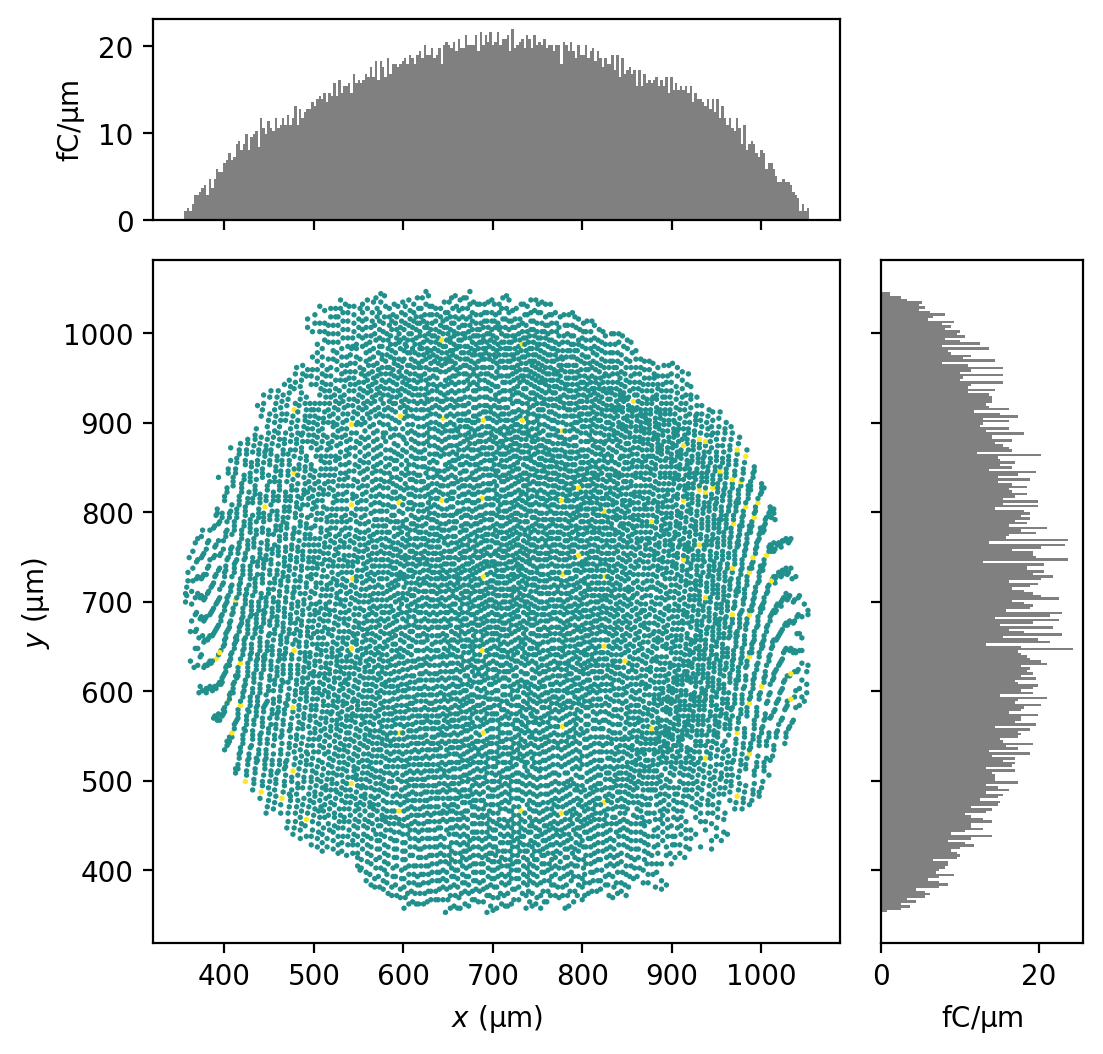

In [5]:
fig = G.particles.plot('x', 'y', bins=256, return_figure=True)
plt.savefig('distgen-laser.png', dpi=150, bbox_inches='tight')

In [6]:
G.particles.write_astra('astra.particles')

In [7]:
from astra import Astra

In [8]:
A = Astra('astra.in', initial_particles=G.particles)

In [9]:
# Turn space charge off
#A.input['charge']['lspch'] = False 
A.verbose=False

In [10]:
A.run()

In [11]:
A.output.keys()

dict_keys(['stats', 'particles', 'run_info', 'other'])

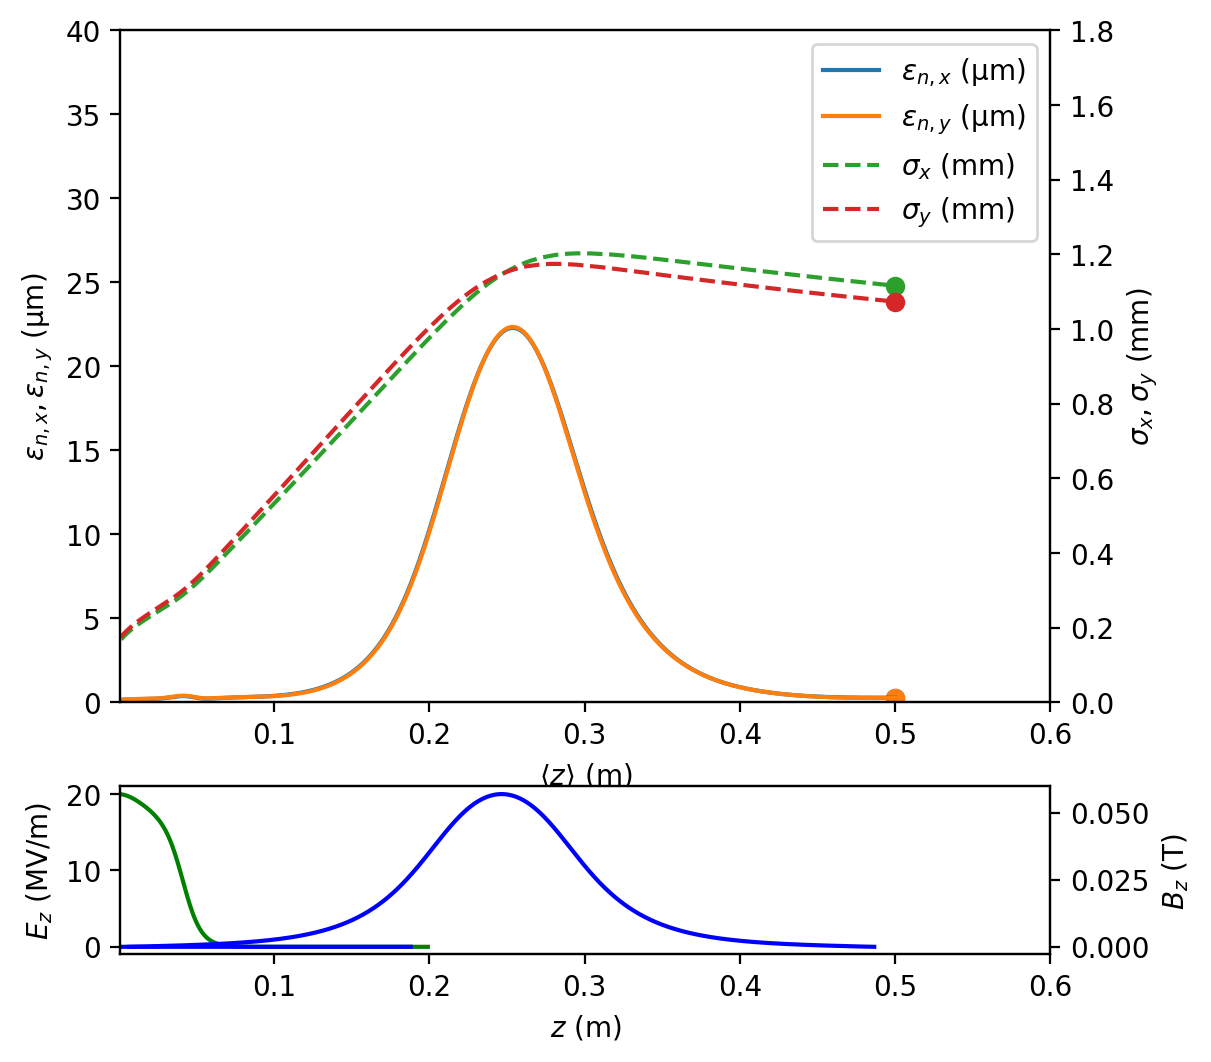

In [12]:
fig = A.plot(y=['norm_emit_x', 'norm_emit_y'], y2=['sigma_x', 'sigma_y'], xlim=(1e-3,.6), ylim=(0, 40e-6), ylim2=(0, 1800e-6),figsize=(6,6), return_figure=True)
#fig.axes[0].set_title('LUME-Astra')
plt.savefig('apex-gun-lume-astra.png', dpi=150, bbox_inches='tight')

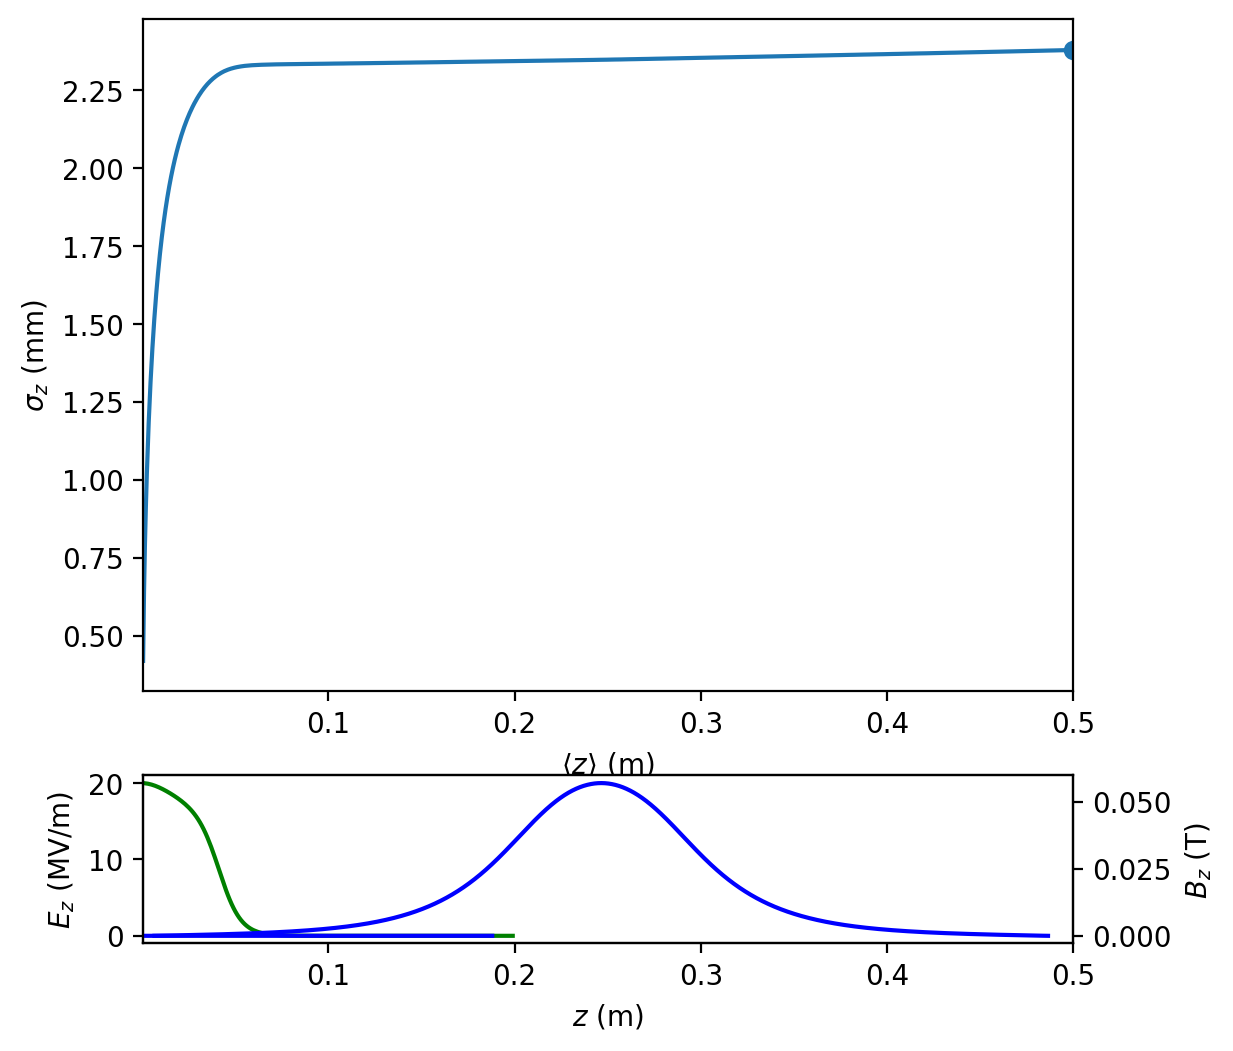

In [13]:
 A.plot('sigma_z')

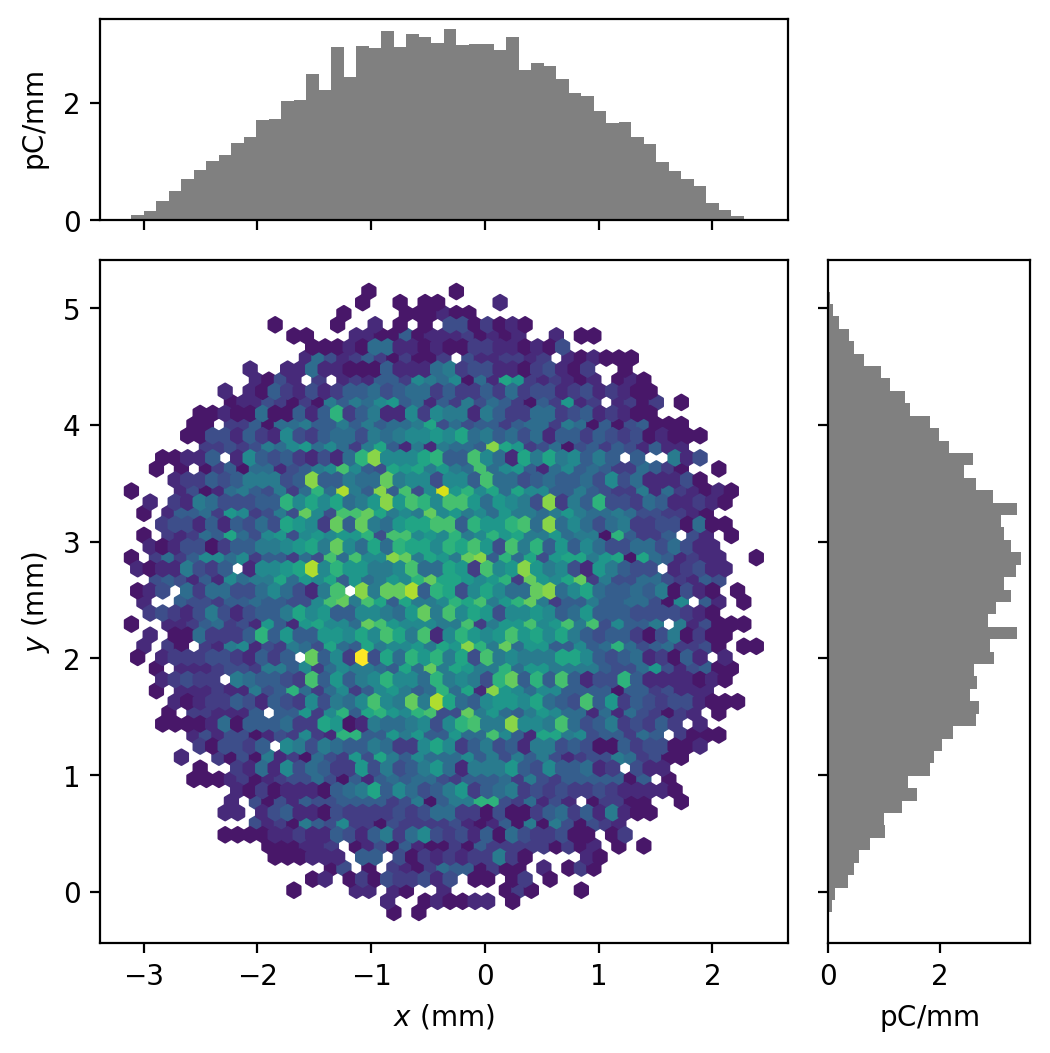

In [14]:
A.particles[-1].plot('x', 'y', bins=50)

In [15]:
# A.archive()